In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [32]:
data = pd.read_csv('inputs/digikala-orders.csv')

data.head(-10)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199985,6194722,483447,7108,2017-01-27 21:55:48.000,3623853.0,همدان,1.0
199986,22105540,4343929,738895,2018-08-30 09:42:40.000,192156.0,تهران,2.0
199987,12099975,6835494,404202,2018-03-29 00:02:54.000,119266.0,رشت,1.0
199988,11347656,5882546,556280,2018-02-23 10:44:40.000,4946606.0,هادی شهر,1.0


In [33]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['YearMonthDate'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)

order_count = data.groupby(['YearMonthDate'])['Quantity_item'].sum().reset_index()

order_count

,YearMonthDate,Quantity_item
0,201309,7.0
1,201310,77.0
2,201311,104.0
3,201312,125.0
4,201401,156.0
...,...,...
59,201808,7944.0
60,201809,8911.0
61,201810,7311.0
62,201811,7572.0


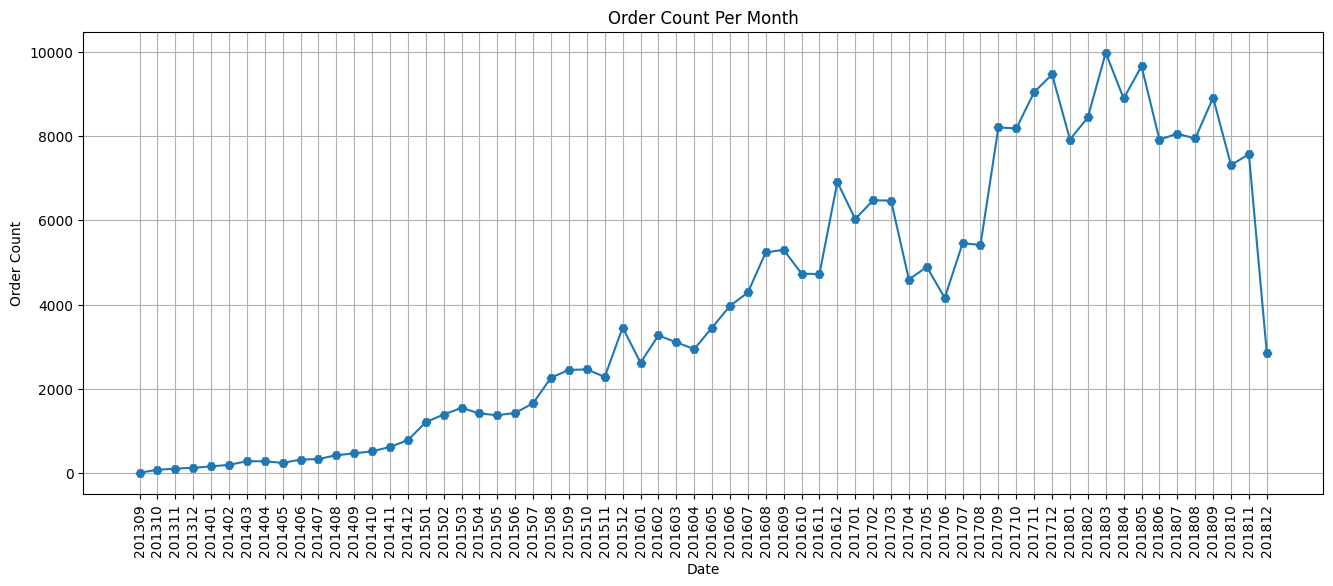

In [55]:
plt.figure(figsize=(16,6))
plt.plot(order_count['YearMonthDate'].to_numpy(dtype=str),order_count['Quantity_item'], marker='H')

plt.xticks(rotation='vertical')
plt.title('Order Count Per Month')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.grid()
plt.savefig('outputs/order_count_per_month.png', dpi=200)
plt.show()

In [35]:
customers = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()

other_customers = 0
for count in customers.query('ID_Customer <= 1500')['ID_Customer']:
    other_customers += count

customers.drop(customers.index[(customers['ID_Customer'] < 1500)], axis=0, inplace=True)
customers.loc[len(customers.index)] = ['سایر شهر ها', other_customers]
customers = customers.sort_values(by="ID_Customer", ascending=False).reset_index(drop=True)

customers

,city_name_fa,ID_Customer
0,تهران,81048
1,سایر شهر ها,42398
2,کرج,4758
3,مشهد,4674
4,اصفهان,4664
5,اهواز,3353
6,شیراز,3076
7,رشت,2414
8,تبریز,2075
9,قم,1905


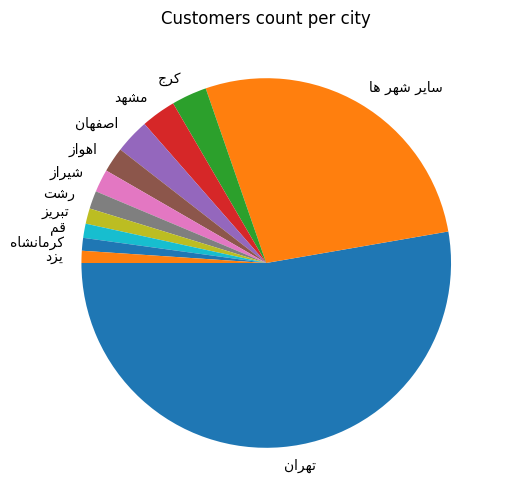

In [56]:
labels = customers['city_name_fa']
persian_labels = [get_display(reshape(label)) for label in labels]

plt.figure(figsize=(12,6))
plt.pie(customers['ID_Customer'].to_numpy(), labels=persian_labels, startangle=180)
plt.title('Customers count per city')
plt.savefig('outputs/customers_per_city.png', dpi=200)
plt.show()